# Sentiment analysis on the tweets during the 2020 USA presidential elections

### We will follow this steps: 
#### 1. Build a machine learning model able to find the sentiment of a text. 
#### 2. Apply it on selected tweets to get sentiment scores. 
#### 3. Display the results.

#### To do that we are using Python with "MatPlotLib" for the data visualization and a few other libraries such as "Pandas" for the data processing

## 0) Imports

In [28]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap
from wordcloud import WordCloud, STOPWORDS
import numpy as np
from PIL import Image
import re
import nltk
from textblob import TextBlob
nltk.download('stopwords', quiet=True)
from nltk.stem.porter import PorterStemmer
from nltk.corpus import stopwords

## 1) Build a sentiment analysis machine learning model

#### To do that we will use a dataset containing a huge variety of tweets, which will be useful to train our machine learning model

### 1.A) Clean the dataset

#### The first step will be to clean and optimize the dataset in order to have less useless values

In [29]:
df = pd.read_csv('Twitter_Data.csv')
df = df.drop_duplicates(subset=['clean_text'])

df["clean_text"] = df["clean_text"].str.replace('[^a-zA-Z- ]', '')
    
#data.isnull().sum()

### 1.B) Analyze the tweet dataset used to build our machine learning model.

#### Then, we split the tweets which are labelled by sentiment score (negative, neutral and positive) in order to display the number of tweets for each score.
#### As we can see there is twice as many positive tweets than negative. This gap can influence our machine learning model so we have to keep that in mind.

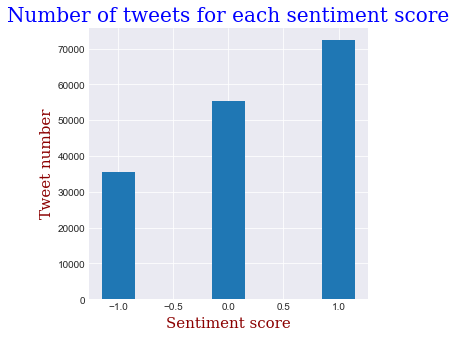

In [30]:
import pandas as pd
from matplotlib import pyplot as plt
from textwrap import wrap
import numpy as np

data = pd.read_csv('Twitter_Data.csv', encoding='latin_1')

scores = [-1, 0, 1]
tweetsNeg = df[df["category"]==-1]
tweetsNeutral = df[df["category"]==0]
tweetsPos = df[df["category"]==1]

tweets = [len(tweetsNeg), len(tweetsNeutral), len(tweetsPos)]

font_title = {'family':'serif','color':'blue','size':20}
font_axis = {'family':'serif','color':'darkred','size':15}

plt.figure(figsize=(5,5))
plt.bar(scores, tweets, width = 0.3)
plt.title("Number of tweets for each sentiment score", fontdict=font_title)
plt.xlabel("Sentiment score", fontdict=font_axis)
plt.ylabel("Tweet number", fontdict=font_axis)
plt.show()

#### Secondly, we visualize the most common words for each tweet category. The wordclouds give us lexical fields for each sentiment score.

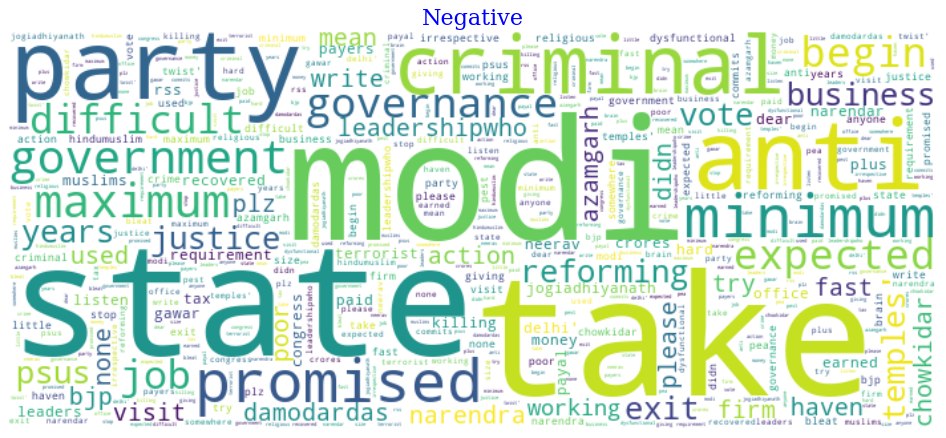

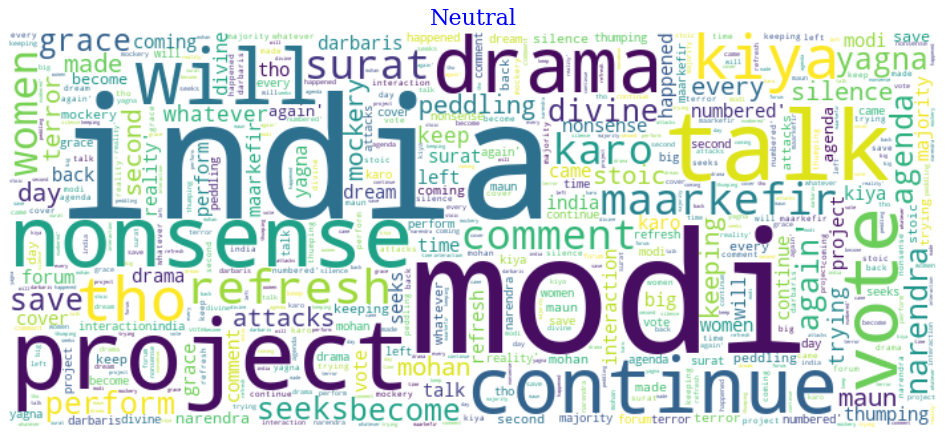

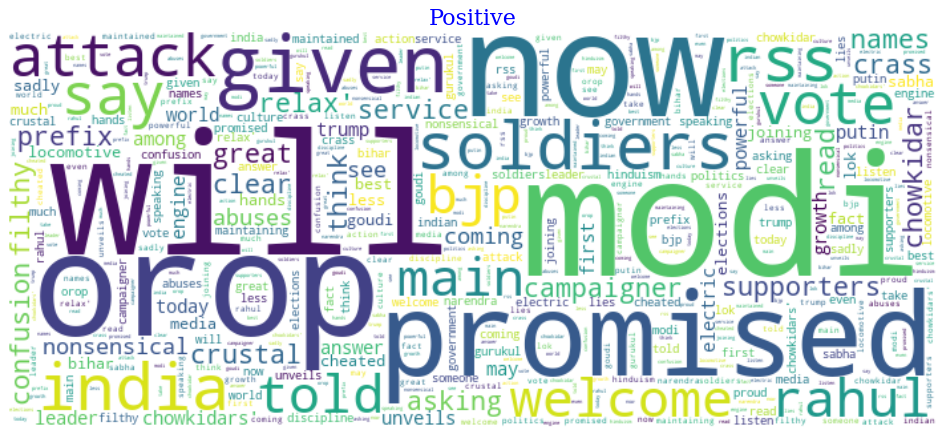

In [31]:
# Function to Create Wordcloud
def create_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
    max_words=1000,
    stopwords=stopwords,
    random_state=42,
    width=700, height=300, repeat=True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontdict=font_title)
    plt.show()

plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(tweetsNeg.values, "Negative")
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(tweetsNeutral.values, "Neutral")
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(tweetsPos.values, "Positive")

#### We can observe that the most common words are:
#### - "state", "anti", "criminal" for the negative tweets
#### - "india", "talk", project" for the neutral tweets
#### - "will", "promised", "given" for the positif tweets

### 1.C) Build the machine learning model

# 2) Data preprocessing & visualization

#### The next step will be to process the "real data", which are the tweets about the presidential elections. In this part we will also build graphs to help us having a better understanding of the data

## 2.1) Get data

#### Our first step will be to get the data from the .csv files. We have two .csv files, one with tweets containing the #trump and one containing the #biden

In [32]:
trump_dataset = pd.read_csv('hashtag_donaldtrump.csv', encoding='latin_1', lineterminator='\n')
biden_dataset = pd.read_csv('hashtag_joebiden.csv', encoding='latin_1', lineterminator='\n')


## 2.2) Clean the data

#### Then, in order to free some space and optimize our process, we will delete some columns that are not useful

In [33]:
trump_dataset['reference'] = 'trump'
biden_dataset['reference'] = 'biden'

dataset = pd.concat([trump_dataset, biden_dataset])

dataset = dataset.drop(columns = ['collected_at', 'tweet_id', 'source', 'user_name', 'user_screen_name', 'user_description', 'user_join_date'])

dataset.sort_values(by='created_at')

dataset.head(20)

,created_at,tweet,likes,retweet_count,user_id,user_followers_count,user_location,lat,long,city,country,continent,state,state_code,reference
0,2020-10-15 00:00:01,#Elecciones2020 | En #Florida: #JoeBiden dice ...,0.0,0.0,3.606665e+08,1860.0,"Philadelphia, PA / Miami, FL",25.774270,-80.193660,NaN,United States of America,North America,Florida,FL,trump
1,2020-10-15 00:00:01,"Usa 2020, Trump contro Facebook e Twitter: cop...",26.0,9.0,3.316176e+08,1067661.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
2,2020-10-15 00:00:02,"#Trump: As a student I used to hear for years,...",2.0,1.0,8.436472e+06,1185.0,Portland,45.520247,-122.674195,Portland,United States of America,North America,Oregon,OR,trump
3,2020-10-15 00:00:02,2 hours since last tweet from #Trump! Maybe he...,0.0,0.0,8.283556e+17,32.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
4,2020-10-15 00:00:08,You get a tie! And you get a tie! #Trump âs ...,4.0,3.0,4.741380e+07,5393.0,Washington DC,38.894992,-77.036558,Washington,United States of America,North America,District of Columbia,DC,trump
5,2020-10-15 00:00:17,@CLady62 Her 15 minutes were over long time ag...,2.0,0.0,1.138416e+09,2363.0,"Perris,California",33.782519,-117.228648,NaN,United States of America,North America,California,CA,trump
6,2020-10-15 00:00:17,@richardmarx Glad u got out of the house! DICK...,0.0,0.0,7.674018e+17,75.0,"Powell, TN",NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump
7,2020-10-15 00:00:18,@DeeviousDenise @realDonaldTrump @nypost There...,0.0,0.0,9.007611e+17,766.0,"Ohio, USA",40.225357,-82.688140,NaN,United States of America,North America,Ohio,OH,trump
8,2020-10-15 00:00:20,One of the single most effective remedies to e...,0.0,0.0,5.404769e+08,151.0,"Pennsylvania, USA",40.969989,-77.727883,NaN,United States of America,North America,Pennsylvania,PA,trump
9,2020-10-15 00:00:21,#Election2020 #Trump \n#FreedomOfSpeech https:...,0.0,0.0,1.305533e+18,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,trump


## 2.3) Number of tweets for each hashtag

#### Let's create a bar graph to see how many tweets there are between these two hashtags.

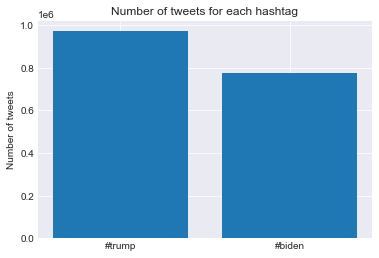

In [34]:
plt.style.use('seaborn-darkgrid')

x = ['#trump', '#biden']
nb_tweets_each_hashtag = [(dataset['reference'] == 'trump').sum(), (dataset['reference'] == 'biden').sum()]

x_pos = [i for i, _ in enumerate(x)]
plt.bar(x_pos, nb_tweets_each_hashtag, align='center')
plt.ylabel("Number of tweets")
plt.title("Number of tweets for each hashtag")

plt.xticks(x_pos, x)

plt.show()


#### We can see that there are about 1/5 more tweets about Donald Trump than Joe Biden. However this graph does not tell us if the tweets are positive or negative

## 2.4) Number of null values

#### This analyse will give to us a more understanding about what pertinent graph can we made in order to have some interesting results.

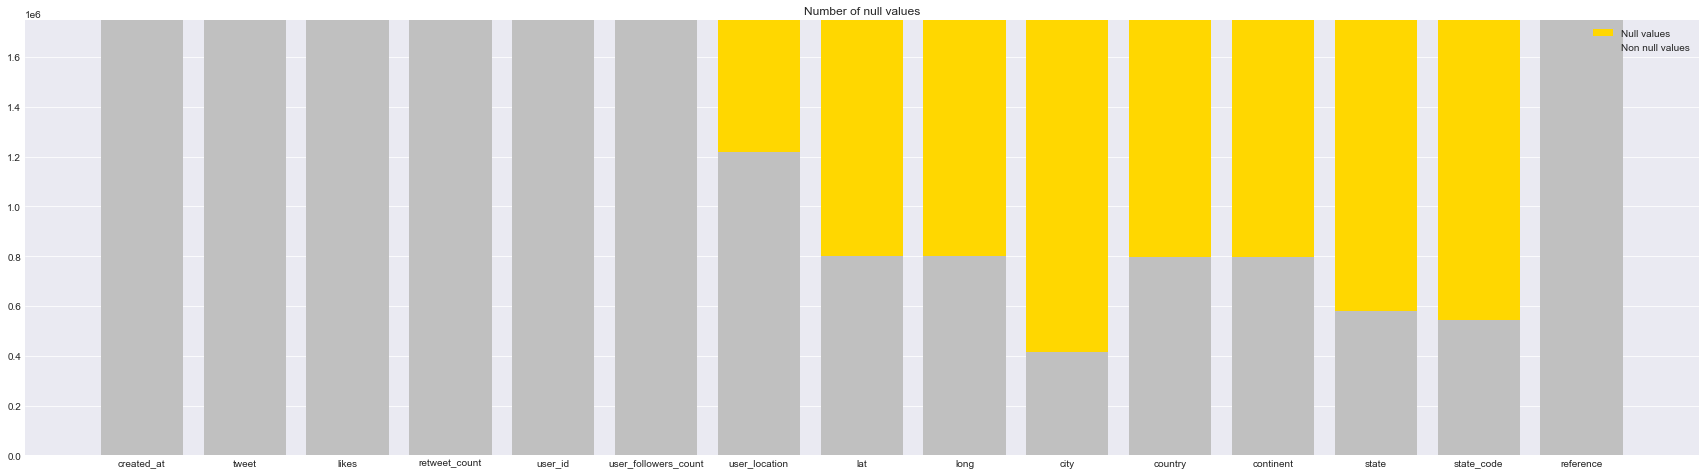

In [35]:
x = ['created_at', 'tweet', 'likes', 'retweet_count', 'user_id', 'user_followers_count', 'user_location', 'lat', 'long', 'city', 'country', 'continent', 'state', 'state_code', 'reference']

nb_tweets = len(dataset)
non_null_values = dataset.count().tolist()
null_values = [nb_tweets - value for value in non_null_values]

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(30,8))
plt.bar(x_pos, null_values, width=0.8, label='Null values', color='gold', bottom=non_null_values)
plt.bar(x_pos, non_null_values, width=0.8, label='Non null values', color='silver')

plt.xticks(x_pos, x)
plt.title("Number of null values")
plt.legend()

plt.show()

#### This is not interesting to compare by city because there is a high number of null values. However, an analyse by country can be interesting to see from where come from the tweets. Maybe we can found some interesting results.

## 2.5) Number of tweets by country

#### After this analyse, we have to analyse data from each country, in order to see the influence of the United States in the world.

In [36]:
# Get each country
countries = dataset['country'].unique()

In [37]:
# Create an empty dataframe array with column country and number_of_tweets
countries_dataset = pd.DataFrame(columns=['country', 'number_of_tweets', 'number_of_tweets_biden', 'number_of_tweets_trump'])

# Populate the array
for country in countries:
    tmp_dataset_country = dataset.loc[(dataset['country'] == country)]
    countries_dataset = countries_dataset.append({
        'country': country,
        'number_of_tweets': len(tmp_dataset_country),
        'number_of_tweets_biden': (tmp_dataset_country['reference'] == 'biden').sum(),
        'number_of_tweets_trump': (tmp_dataset_country['reference'] == 'trump').sum(),
    }, ignore_index=True)

# Take just the first 10 country
countries_dataset = countries_dataset.sort_values(by='number_of_tweets', ascending=False)
countries_dataset = countries_dataset[:11]

# Merge United states and United states of america
nb_tweets_united_states = countries_dataset[countries_dataset['country'] == 'United States']['number_of_tweets']
nb_tweets_united_states_of_america = countries_dataset[countries_dataset['country'] == 'United States of America']['number_of_tweets']

countries_dataset.loc[countries_dataset['country'] == 'United States of America', 'number_of_tweets'] = int(nb_tweets_united_states) + int(nb_tweets_united_states_of_america)

countries_dataset = countries_dataset[countries_dataset['country'] != 'United States']

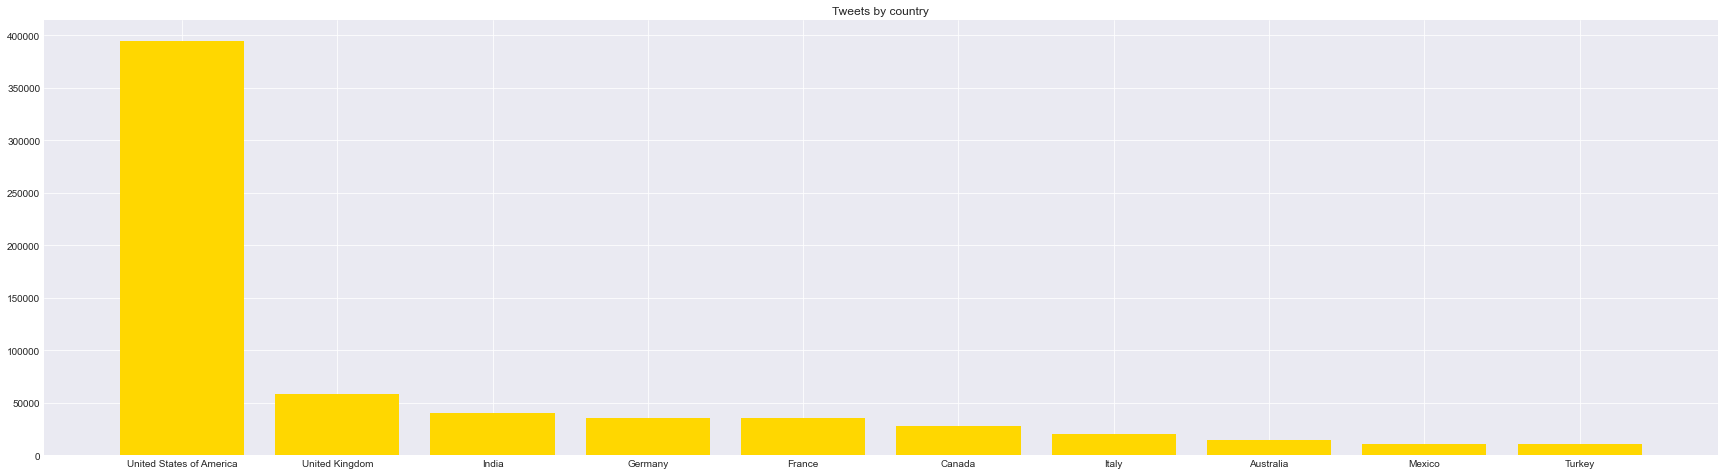

In [38]:
x = countries_dataset['country'].tolist()

x_pos = [i for i, _ in enumerate(x)]

plt.figure(figsize=(30,8))
plt.bar(x_pos, countries_dataset['number_of_tweets'].tolist(), width=0.8, color='gold')

plt.xticks(x_pos, x)
plt.title("Tweets by country")

plt.show()

#### Obviously, the United States contains the most tweets, but we can also see that there is a strong interest in European countries, Canada and also the one that is pretty surprising is India. There is certainly a strong indian community on Twitter.

### Then, let's see which hashtag is the most used between all these countries.

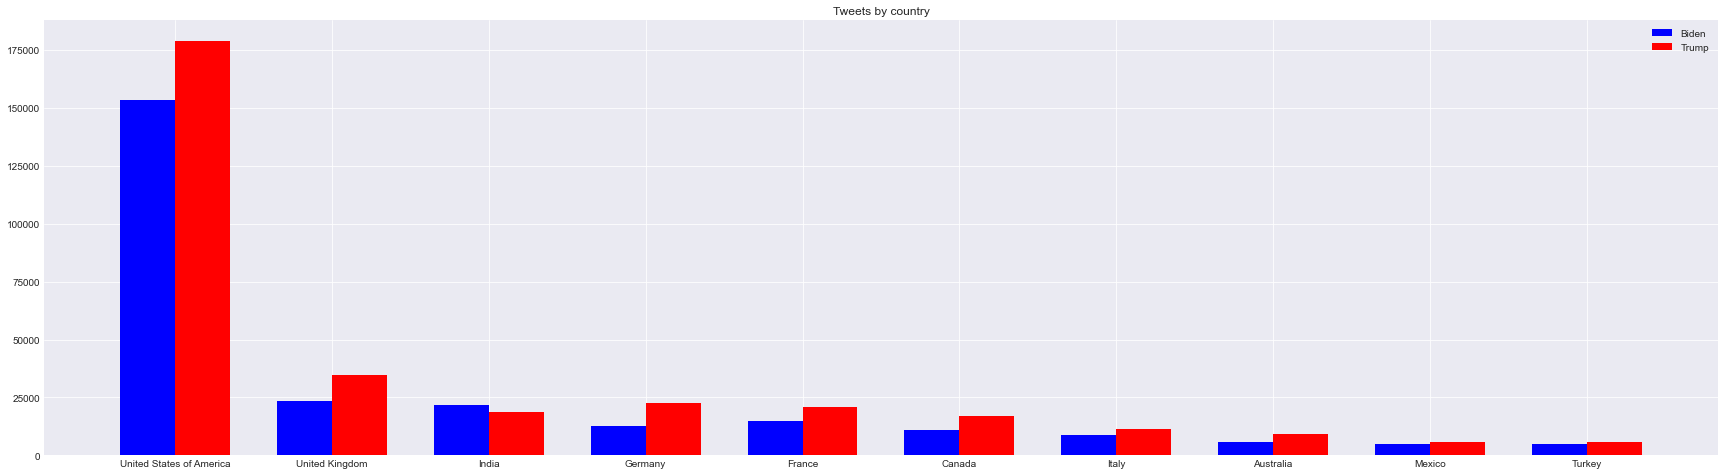

In [39]:
# Display the number of tweets by hashtag and by country
x = countries_dataset['country'].tolist()

x_pos = np.arange(len(x))
width = 0.35

plt.figure(figsize=(30,8))
plt.bar(x_pos, countries_dataset['number_of_tweets_biden'].tolist(), width=width, color="blue", label="Biden")
plt.bar(x_pos + width, countries_dataset['number_of_tweets_trump'].tolist(), width=width, color='red', label="Trump")

plt.xticks(x_pos + width / 2, x)
plt.title("Tweets by country")
plt.legend()

plt.show()

#### Except for India, the #trump is the most used in every country. However, that's the same problem as before, we don't know if these tweets are mainly positive or negative about Donald Trump

## 2.6) Tweets by date

#### An important analyse to do is to see which day contains the most of tweets.

In [40]:
countries = dataset['country'].unique()
tweets_by_day = [{'created_at': group[0], 'nb_tweets': len(group[1]), 'nb_tweets_biden': len(group[1]['reference'][(group[1]['reference'] == 'biden')]), 'nb_tweets_trump': len(group[1]['reference'][(group[1]['reference'] == 'trump')])} for group in dataset.groupby(pd.to_datetime(dataset['created_at']).dt.date)]

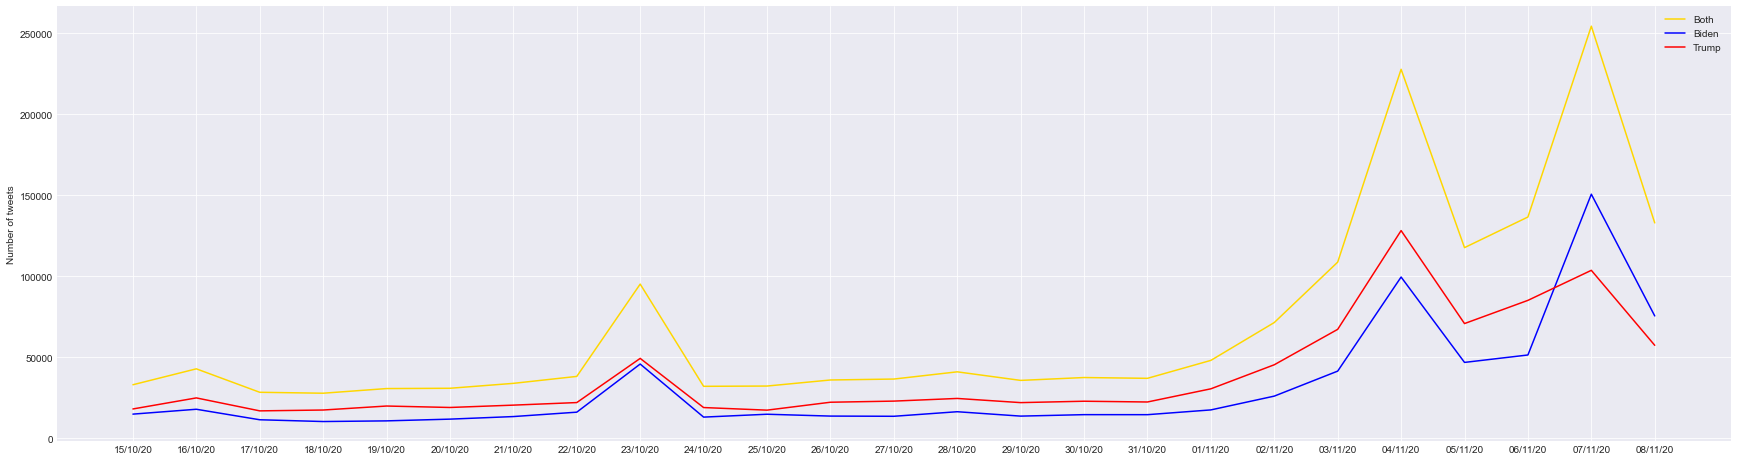

In [41]:
plt.figure(figsize=(30,8))

x_pos = np.arange(len(tweets_by_day))

plt.plot([tweet['nb_tweets'] for tweet in tweets_by_day], label="Both", color="gold")
plt.plot([tweet['nb_tweets_biden'] for tweet in tweets_by_day], label="Biden", color="blue")
plt.plot([tweet['nb_tweets_trump'] for tweet in tweets_by_day], label="Trump", color="red")

plt.xticks(x_pos, [tweet['created_at'].strftime("%d/%m/%y") for tweet in tweets_by_day])

plt.ylabel('Number of tweets')
plt.legend()
plt.show()

#### So as we can see, there is a peak on October 23rd, November 4th and November 7th. An interesting part will be to try to know what happened at these specific dates  to see if the general opinion has changed about these two candidates.

## 2.6) Number of like by day

#### This graph helps us having a better understanding of the likes distribution between the two candidates. However, same problem as before, the likes could be related to a negative tweet about these two candidates, there is no way for us to know ...

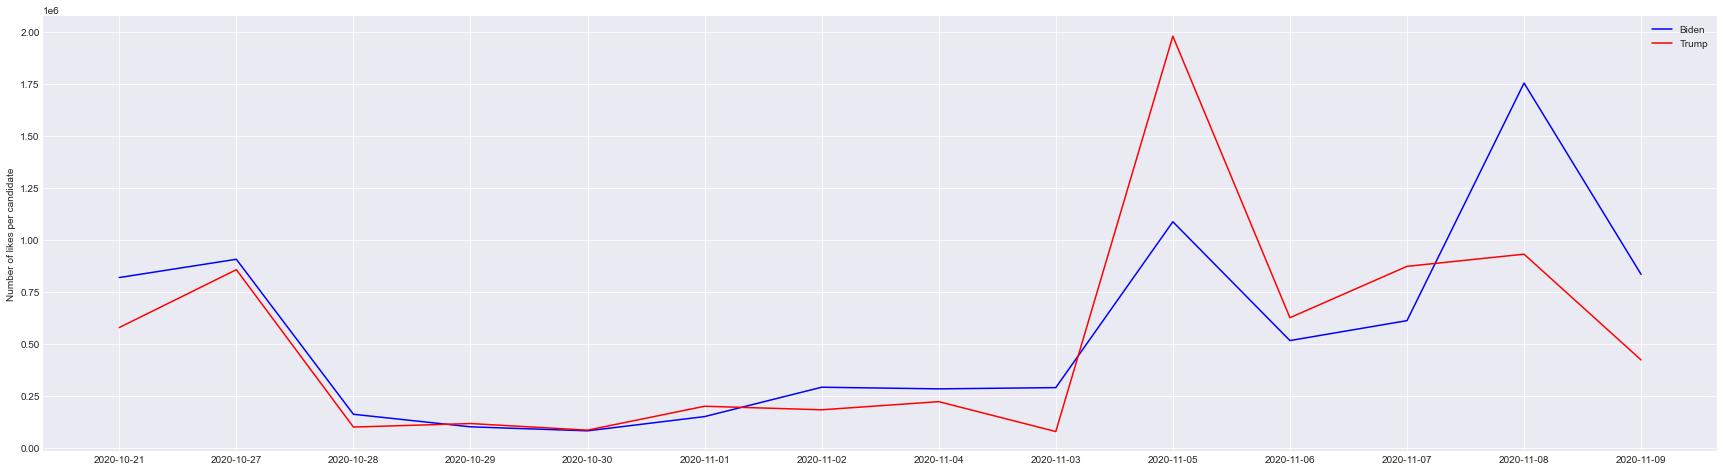

In [42]:
likes_trump = []
likes_per_day_trump = {}

likes_biden = []
likes_per_day_biden = {}

for index, row in trump_dataset.iterrows():
    likes_trump.append({"date": row['collected_at'].split()[0], "likes": row['likes']})
for index, row in biden_dataset.iterrows():
    likes_biden.append({"date": row['collected_at'].split()[0], "likes": row['likes']})

for like_trump in likes_trump:
    if like_trump["date"] in likes_per_day_trump:
        likes_per_day_trump[like_trump["date"]] += like_trump["likes"]
    else:
        likes_per_day_trump[like_trump["date"]] = like_trump["likes"]

for like_biden in likes_biden:
    if like_biden["date"] in likes_per_day_biden:
        likes_per_day_biden[like_biden["date"]] += like_biden["likes"]
    else:
        likes_per_day_biden[like_biden["date"]] = like_biden["likes"]

plt.figure(figsize=(30,8))

x_pos = np.arange(len(likes_per_day_trump))

plt.plot([like for like in likes_per_day_biden.values()], label="Biden", color="blue")
plt.plot([like for like in likes_per_day_trump.values()], label="Trump", color="red")

plt.xticks(x_pos, [key for key in likes_per_day_trump])

plt.ylabel('Number of likes per candidate')
plt.legend()
plt.show()

#### ... so that's why we need sentiment analysis

# 3) Sentiment analysis on tweets

#### The main part of our project is the sentiment analysis of the tweets. With that sentiment analysis we can have a better understanding of the tweets, and solve the analysis problems we had earlier. Now we will see if the tweets are positive, neutral or negative about the two candidates

In [43]:
nltk.download('stopwords', quiet=True)

font_title = {'family':'serif','color':'blue','size':20}

# Function to Create Wordcloud
def create_wordcloud(text, title):
    stopwords = set(STOPWORDS)
    wc = WordCloud(background_color="white",
                   max_words=1000,
                   stopwords=stopwords,
                   random_state=42,
                   width=700, height=300, repeat=True)
    wc.generate(str(text))
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    plt.title(title, fontdict=font_title)
    plt.show()

In [44]:
def clean_tweet(tweet):
    return re.sub("(@[A-Za-z0-9_]+)|(#[A-Za-z0-9_]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", tweet)

def clean_tweets(_tweets):
    new_tweets = []
    for tweet in _tweets:
        tweet = clean_tweet(tweet)
        new_tweets.append(tweet)
    return new_tweets

def init_tweets_by_day():
    _tweets_by_day = []

    for group in dataset.groupby(pd.to_datetime(dataset['created_at']).dt.date):
        _tweets = []

        for i, tweet_dataset in group[1].iterrows():
            clean_t = clean_tweet(tweet_dataset['tweet'])
            _tweets.append({
                'tweet': tweet_dataset['tweet'],
                'clean_tweet': clean_t,
                'sentiment': TextBlob(clean_t).sentiment,
                'reference': tweet_dataset['reference']
            })
        _tweets_by_day.append({
            'created_at': group[0],
            'nb_tweets': len(group[1]),
            'nb_tweets_biden': len(group[1]['reference'][(group[1]['reference'] == 'biden')]),
            'nb_tweets_trump': len(group[1]['reference'][(group[1]['reference'] == 'trump')]),
            'tweets': _tweets
        })
    return _tweets_by_day

tweets_by_day = init_tweets_by_day()

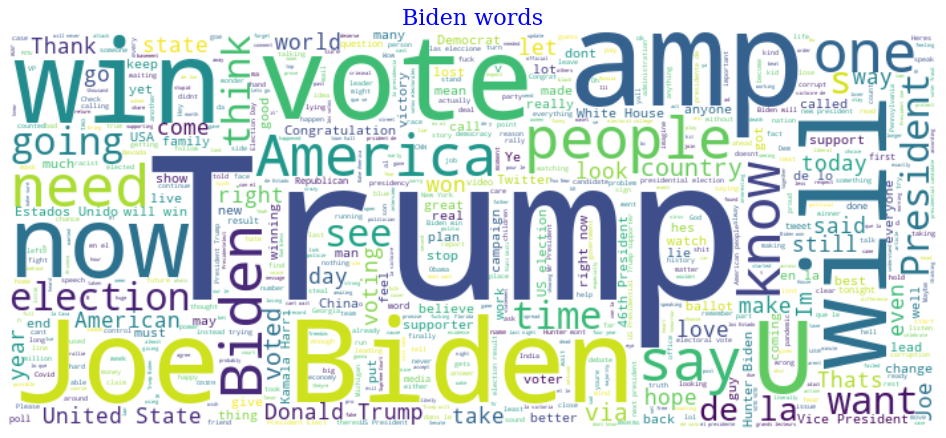

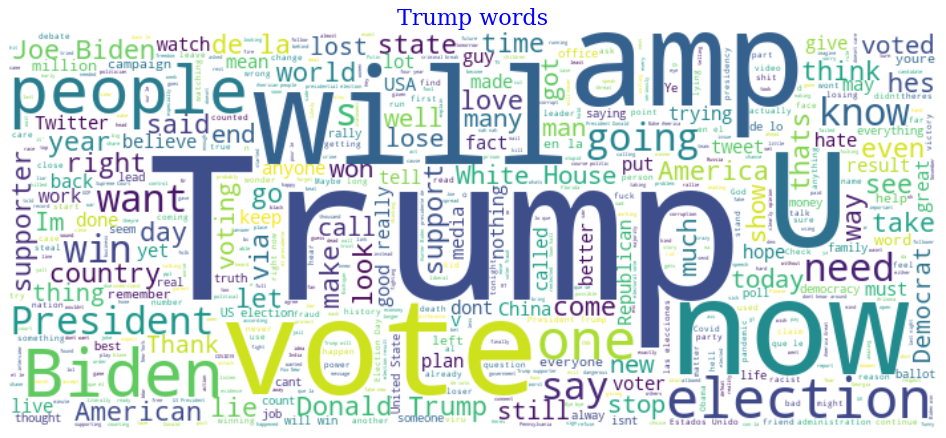

In [45]:
def get_array_tweets(_tweets_by_day, reference):
    _tweets = []
    for tweet_by_day in _tweets_by_day:
        for tweet in tweet_by_day['tweets']:
            if tweet['reference'] != reference:
                continue
            _tweets.append(tweet['clean_tweet'])
    return _tweets

trump_tweets = get_array_tweets(tweets_by_day, 'trump')
biden_tweets = get_array_tweets(tweets_by_day, 'biden')

plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(biden_tweets, "Biden words")
plt.figure(figsize=(15, 8), dpi=80)
create_wordcloud(trump_tweets, "Trump words")

#### This wordcloud allows us to have a better understanding of the main words in #biden and #trump tweets. As we can see there are no real positive or negative word that comes up about these two candidates

In [46]:
def compute_sentiments(_tweets_by_day, reference = None):
    nb_neg_tweets = 0
    nb_pos_tweets = 0
    _nb_tweets = 0

    for tweet_by_day in _tweets_by_day:
        for tweet in tweet_by_day['tweets']:
            if tweet['reference'] == reference:
                continue
            sentiment = tweet['sentiment']
            if sentiment.polarity < 0:
                nb_neg_tweets += 1
            elif sentiment.polarity > 0:
                nb_pos_tweets += 1
            _nb_tweets += 1
    return nb_neg_tweets, nb_pos_tweets, _nb_tweets

nb_neg_tweets_biden, nb_pos_tweets_biden, nb_tweets_biden = compute_sentiments(tweets_by_day, "biden")
nb_neg_tweets_trump, nb_pos_tweets_trump, nb_tweets_trump = compute_sentiments(tweets_by_day, "trump")
nb_tweets_total = nb_tweets_biden + nb_pos_tweets_trump
average_neg_tweet = (nb_neg_tweets_trump + nb_neg_tweets_biden) / nb_tweets_total * 100

In [47]:
average_pos_tweet = (nb_pos_tweets_trump + nb_pos_tweets_biden) / nb_tweets_total * 100
average_pos_tweet_biden = nb_pos_tweets_biden / nb_tweets_biden * 100
average_pos_tweet_trump = nb_pos_tweets_trump / nb_tweets_trump * 100
average_neg_tweet_biden = nb_neg_tweets_biden / nb_tweets_biden * 100
average_neg_tweet_trump = nb_neg_tweets_trump / nb_tweets_trump * 100

print('Average positive tweet ' + str(average_pos_tweet))
print('Average negative tweet ' + str(average_neg_tweet))
print('Average positive tweet biden ' + str(average_pos_tweet_biden))
print('Average positive tweet trump ' + str(average_pos_tweet_trump))
print('Average negative tweet biden ' + str(average_neg_tweet_biden))
print('Average negative tweet trump ' + str(average_neg_tweet_trump))

Average positive tweet 41.74592775379622
Average negative tweet 20.797305566456263
Average positive tweet biden 27.834762735099428
Average positive tweet trump 29.844404455737394
Average negative tweet biden 15.947571321603554
Average negative tweet trump 12.26782307828948


#### Now we can see an average percentage of positive/negative tweets about Joe Biden and Donald Trump

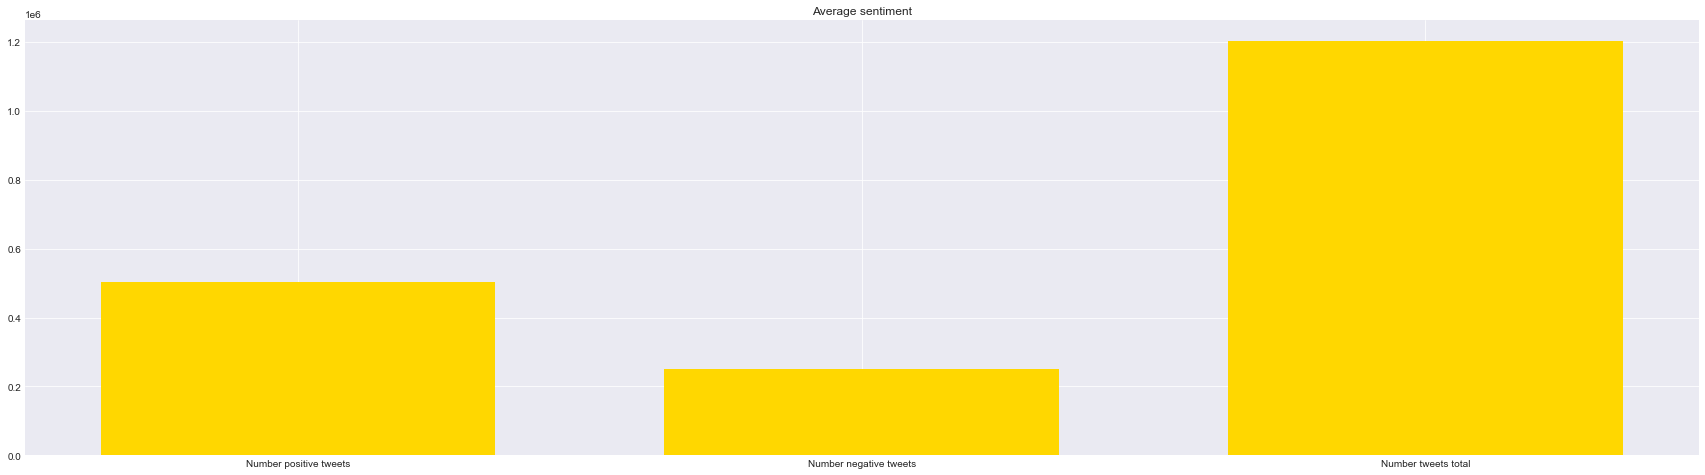

In [48]:
x = ['Number positive tweets', 'Number negative tweets', 'Number tweets total']

x_pos = np.arange(len(x))
width = 0.7

plt.figure(figsize=(30,8))
plt.bar(x_pos, [(nb_pos_tweets_trump + nb_pos_tweets_biden), (nb_neg_tweets_trump + nb_neg_tweets_biden), nb_tweets_total], width=width, color="gold")

plt.xticks(x_pos, x)
plt.title("Average sentiment")

plt.show()

#### This graph helps us visualize the number of positive/negative tweets and the number of total tweets. As we can see, half of the tweets are not positive or negative, therefore considered as "neutral"

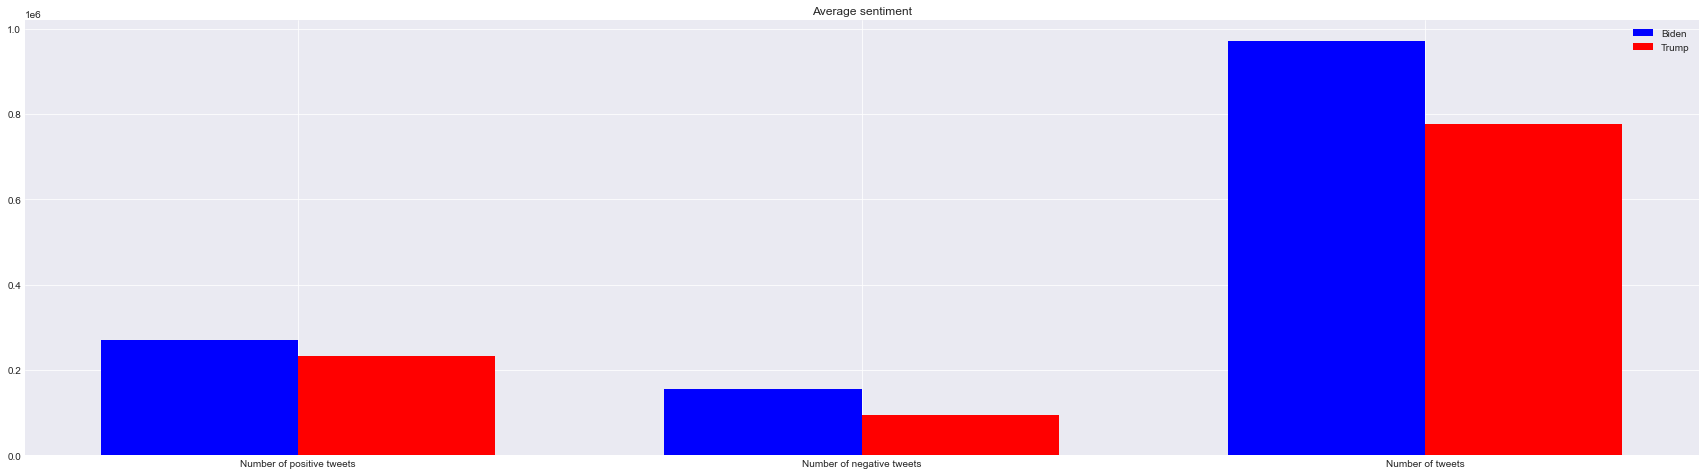

In [49]:
x = ['Number of positive tweets', 'Number of negative tweets', 'Number of tweets']

x_pos = np.arange(len(x))
width = 0.35

plt.figure(figsize=(30,8))
plt.bar(x_pos, [nb_pos_tweets_biden, nb_neg_tweets_biden, nb_tweets_biden], width=width, color="blue", label="Biden")
plt.bar(x_pos + width, [nb_pos_tweets_trump, nb_neg_tweets_trump, nb_tweets_trump], width=width, color='red', label="Trump")

plt.xticks(x_pos + width / 2, x)
plt.title("Average sentiment")
plt.legend()

plt.show()

#### Now we can see the number of positive/negative tweets related to #trump and #biden. We start to have a better understanding of the global opinion on Twitter.
#### We can also see that there are more tweets about Joe Biden, therefore he will have a higher amount of positive/negative tweets

### Another important part will be to see the evolution of the sentiment on the two candidates day after day. It will be very useful if we want to link it with events that could have caused an ascent or a descent of the sentiment about a candidate (debate ...)

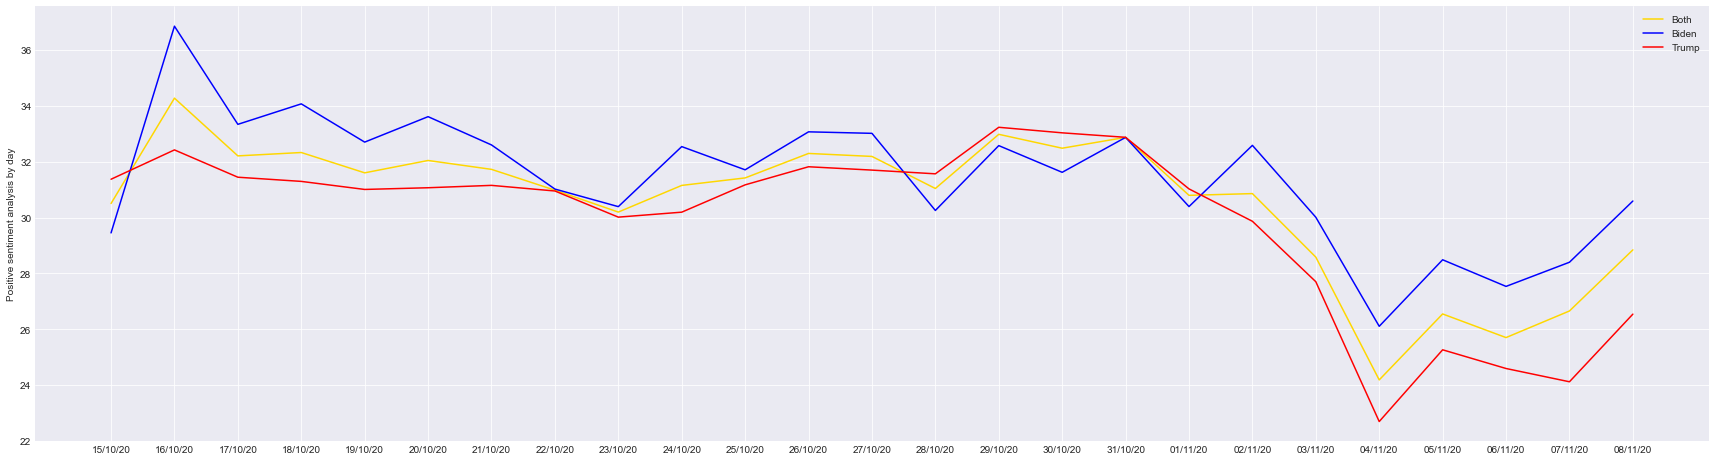

In [50]:
def compute_positive_sentiment_day(tweets, reference = None):
    nb_tweets_neg = 0
    nb_tweets_pos = 0
    nb_tweets = 0

    for tweet in tweets:
        if tweet['reference'] != reference and reference is not None:
            continue
        sentiment = tweet['sentiment']
        if sentiment.polarity < 0:
            nb_tweets_neg += 1
        elif sentiment.polarity > 0:
            nb_tweets_pos += 1
        nb_tweets += 1
    return (nb_tweets_pos / nb_tweets) * 100

plt.figure(figsize=(30,8))

x_pos = np.arange(len(tweets_by_day))

plt.plot([compute_positive_sentiment_day(tweet['tweets']) for tweet in tweets_by_day], label="Both", color="gold")
plt.plot([compute_positive_sentiment_day(tweet['tweets'], 'biden') for tweet in tweets_by_day], label="Biden", color="blue")
plt.plot([compute_positive_sentiment_day(tweet['tweets'], 'trump') for tweet in tweets_by_day], label="Trump", color="red")

plt.xticks(x_pos, [tweet['created_at'].strftime("%d/%m/%y") for tweet in tweets_by_day])

plt.ylabel('Positive sentiment analysis by day')
plt.legend()
plt.show()

#### Here we have the evolution of the positive sentiment analysis day by day

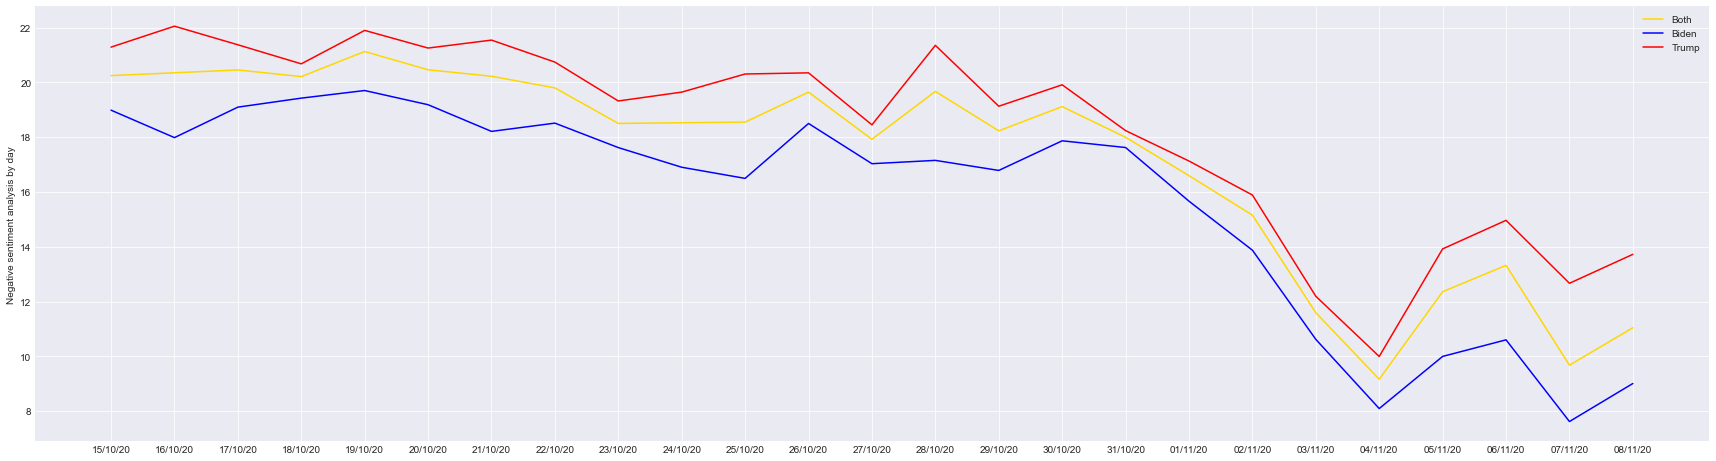

In [51]:
def compute_negative_sentiment_day(tweets, reference = None):
    nb_tweets_neg = 0
    nb_tweets_pos = 0
    nb_tweets = 0

    for tweet in tweets:
        if tweet['reference'] != reference and reference is not None:
            continue
        sentiment = tweet['sentiment']
        if sentiment.polarity < 0:
            nb_tweets_neg += 1
        elif sentiment.polarity > 0:
            nb_tweets_pos += 1
        nb_tweets += 1
    return (nb_tweets_neg / nb_tweets) * 100

plt.figure(figsize=(30,8))

x_pos = np.arange(len(tweets_by_day))

plt.plot([compute_negative_sentiment_day(tweet['tweets']) for tweet in tweets_by_day], label="Both", color="gold")
plt.plot([compute_negative_sentiment_day(tweet['tweets'], 'biden') for tweet in tweets_by_day], label="Biden", color="blue")
plt.plot([compute_negative_sentiment_day(tweet['tweets'], 'trump') for tweet in tweets_by_day], label="Trump", color="red")

plt.xticks(x_pos, [tweet['created_at'].strftime("%d/%m/%y") for tweet in tweets_by_day])

plt.ylabel('Negative sentiment analysis by day')
plt.legend()
plt.show()

#### And here we have the evolution of the negative sentiment analysis day by day

#### The two following graphs help us having a better understanding of the evolution of positive/negative tweets of both candidates related to the day.

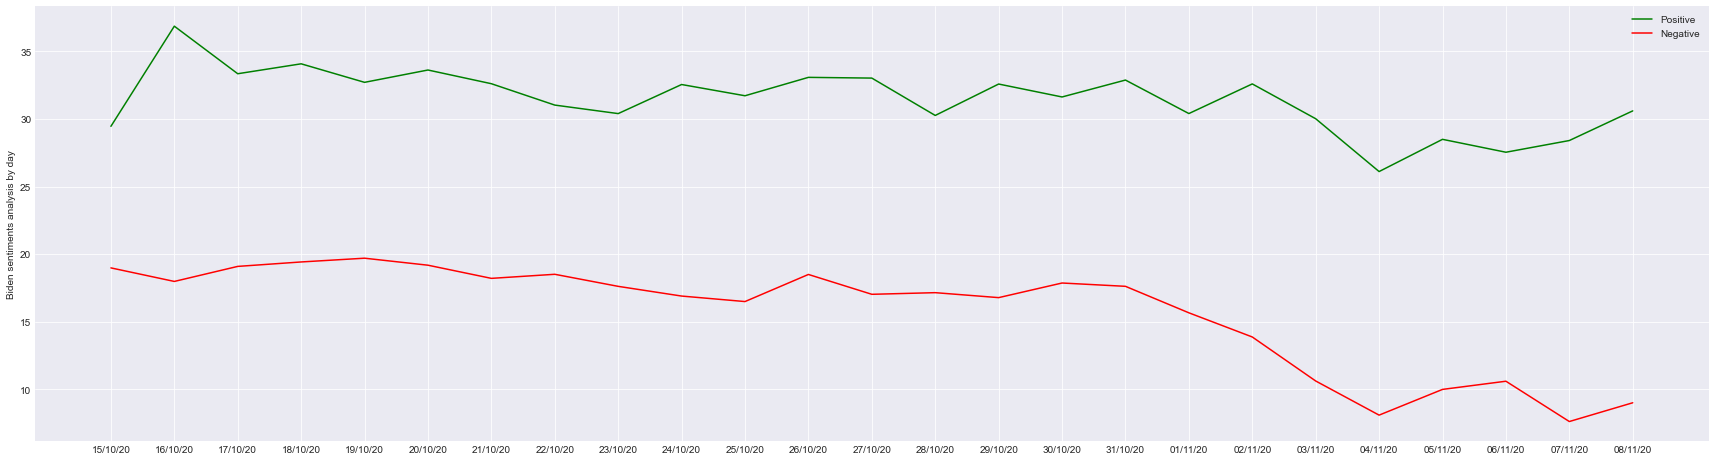

In [52]:
plt.figure(figsize=(30,8))

x_pos = np.arange(len(tweets_by_day))

plt.plot([compute_positive_sentiment_day(tweet['tweets'], 'biden') for tweet in tweets_by_day], label="Positive", color="green")
plt.plot([compute_negative_sentiment_day(tweet['tweets'], 'biden') for tweet in tweets_by_day], label="Negative", color="red")

plt.xticks(x_pos, [tweet['created_at'].strftime("%d/%m/%y") for tweet in tweets_by_day])

plt.ylabel('Biden sentiments analysis by day')
plt.legend()
plt.show()

#### This graph shows us the Joe Biden sentiment analysis day by day

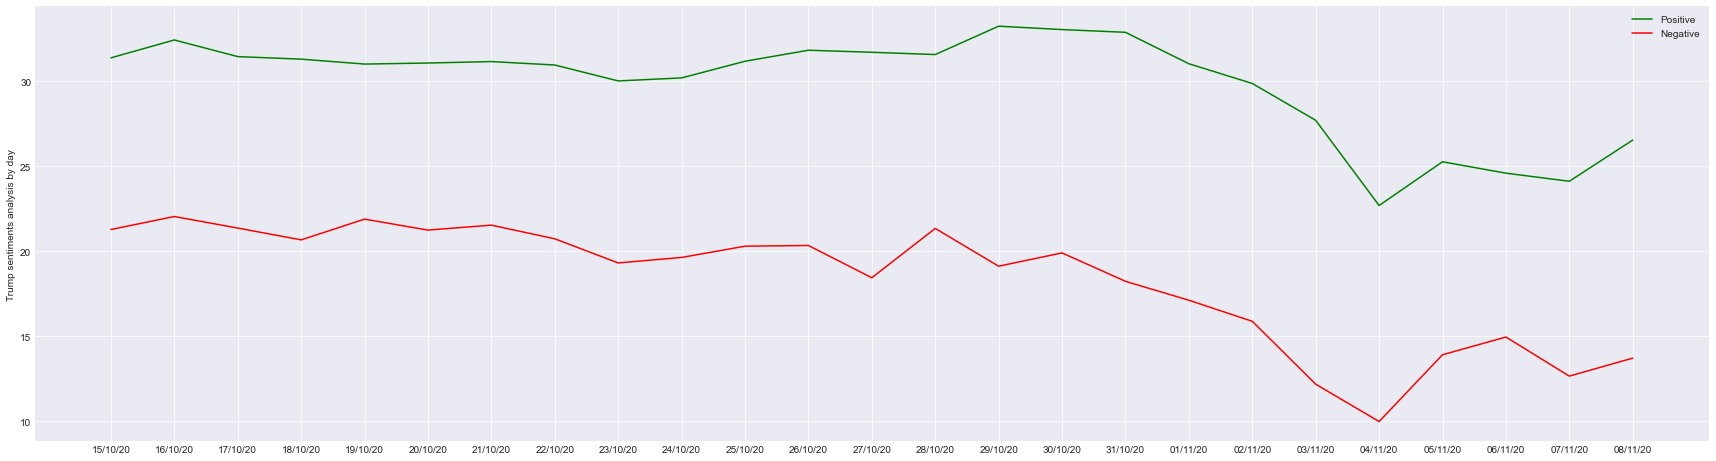

In [53]:
plt.figure(figsize=(30,8))

x_pos = np.arange(len(tweets_by_day))

plt.plot([compute_positive_sentiment_day(tweet['tweets'], 'trump') for tweet in tweets_by_day], label="Positive", color="green")
plt.plot([compute_negative_sentiment_day(tweet['tweets'], 'trump') for tweet in tweets_by_day], label="Negative", color="red")

plt.xticks(x_pos, [tweet['created_at'].strftime("%d/%m/%y") for tweet in tweets_by_day])

plt.ylabel('Trump sentiments analysis by day')
plt.legend()
plt.show()

#### This graph shows us the Donald Trump sentiment analysis day by day

### To conclude, there is no clear gap between the two candidates. We might have expected a bigger difference on the sentiments of the two candidates.
### Now we can try to relate these graphs with events that happened during the campaign, to see if there are events that have made the sentiment of the users change.